## UNSUPERVISED MACHINE LEARNING PROJECT: Under-Developed Countries Prediction via K-Means Clustering 

#### **INTRODUCTION**

Underdeveloped countries, also known as least developed countries (LDCs), are characterized by low levels of economic development, low income per capita, high poverty rates, limited access to basic services such as education and healthcare, and a lack of infrastructure and technological advancement. These countries often face significant challenges in terms of economic growth, social development, and overall well-being of their populations.

Charities play a crucial role in providing assistance and support to underdeveloped countries. They provide immediate relief and assistance during times of crisis, such as natural disasters, conflict, or famine. They deliver emergency supplies like food, clean water, shelter, and medical aid to affected communities.

Charities also implement programs and projects aimed at reducing poverty and improving the livelihoods of individuals and communities in underdeveloped countries. This can involve initiatives like microfinance programs, vocational training, income-generation projects, and support for small-scale entrepreneurs. They also support education and healthcare initiatives in underdeveloped countries by building schools, providing educational resources, training teachers, and improving access to quality healthcare services

The aim of this project is to use an **Unsupervised Machine Learning Model (K-Means Clustering)** in order to determine which countries in the dataset need the charity's help the most. 

#### **IMPORT LIBRARIES**

In [280]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Standardizatio / Normalization Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Machine Leaning 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hcluster

# Evaluation & Metrics Tolls
from sklearn import metrics
from sklearn.metrics import silhouette_score
from math import isnan
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


# Misc.
import warnings
warnings.filterwarnings('ignore')


#### **UPLOAD DATASET**

In [281]:
# Upload dataset
country_data = pd.read_csv('Country-data.csv')
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**DATA DICTIONARY**

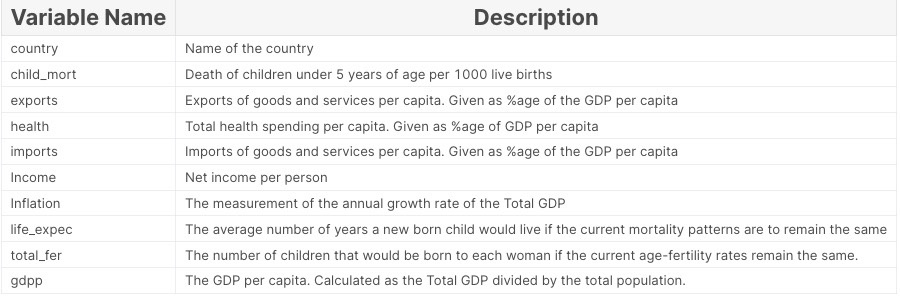

In [2]:
from IPython.display import Image
Image("countries_dictionary.jpeg")

#### **DATA EXPLORATION**

In [282]:
# Check shape
country_data.shape

(167, 10)

In [283]:
# Check info
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [284]:
# Check statistical values
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [285]:
# Check for missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [286]:
# Check for duplicates
country_data.duplicated().sum()

0

* All features in this dataset are numerical except the 'country' column. I will therefore create two lists: one for all the numerical features, and another for the categorical feature ('country')

In [287]:
# creating a list of columns in my data
col = list(country_data.columns)
# removing 'country' column from that list
col.remove('country')
# creating a new list categorical_features and assigning it the value ['country'] as a categorical feature
categorical_features = ['country']
# After removing 'country', all columns in our dataset is numerical, so will now create a new list for numerical features / columns
numerical_features = [*col]
# printing both numerical & categorical columns
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


* Checking for the distribution of all (numerical) features in the dataset 

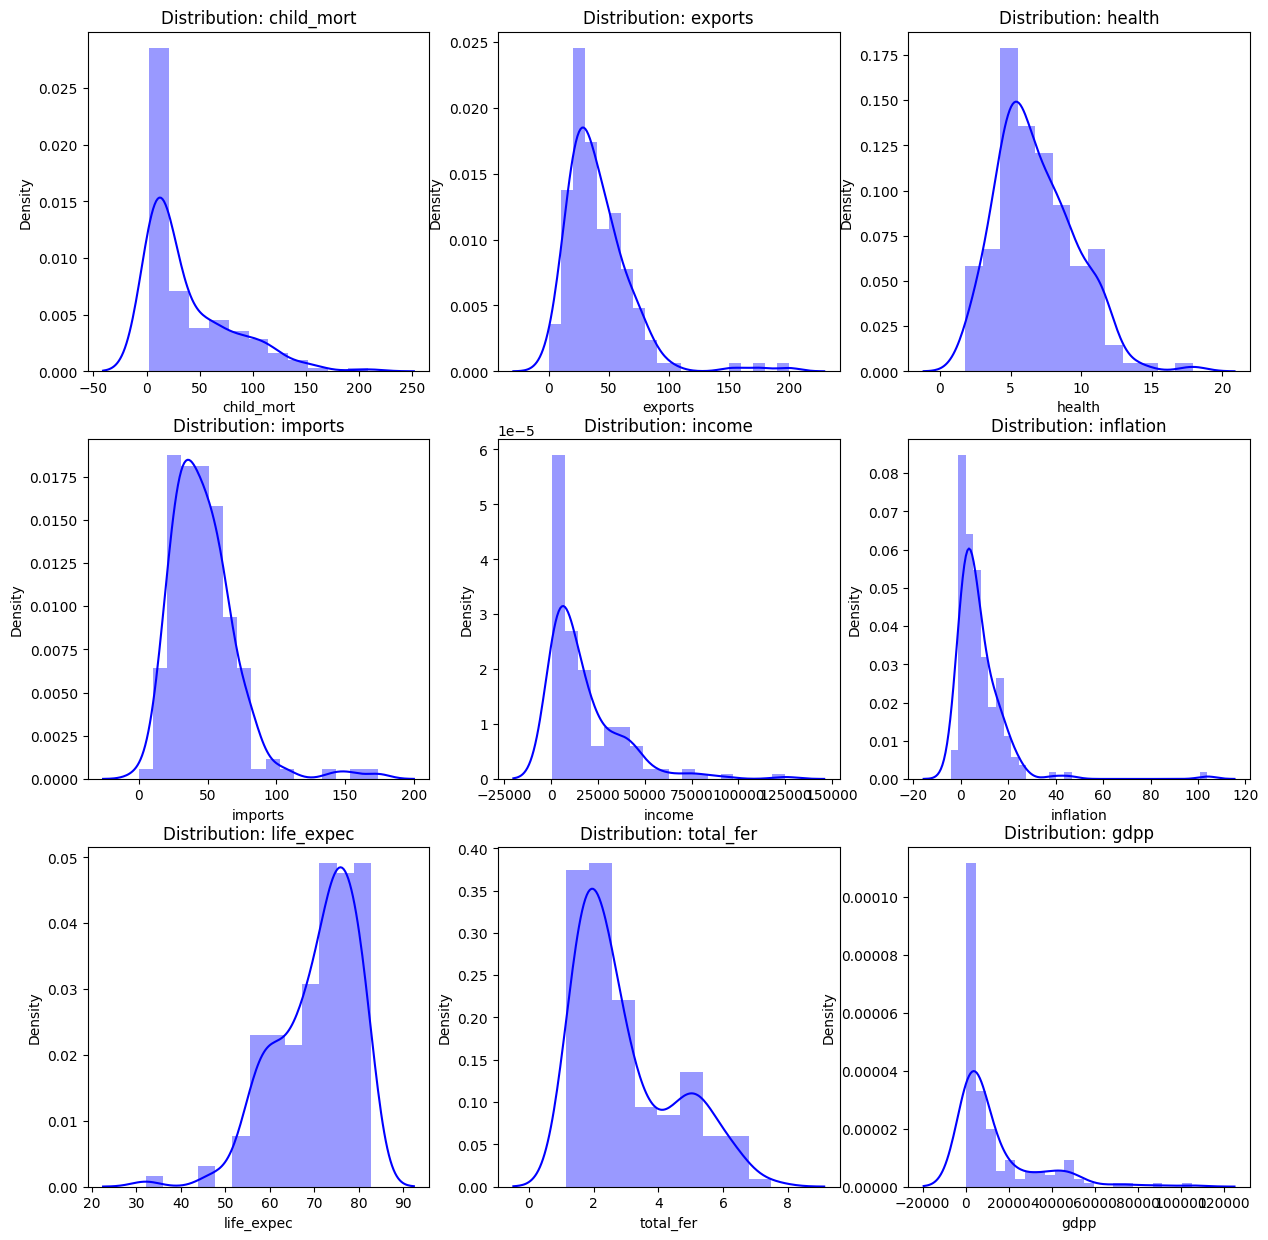

In [288]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(country_data[numerical_features[i]], color='blue')
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)
plt.show()





* From the above we can see that most numerical categories in our data are right / positively skewed except for 'life_expec', which is left or negatively skewed. 
* 'health' has a normal distribution.

In [289]:
# Correlation Matrix to show positve & negative correlations between the different features of our dataset
corr_mat = country_data.corr(numeric_only=True)
corr_mat

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

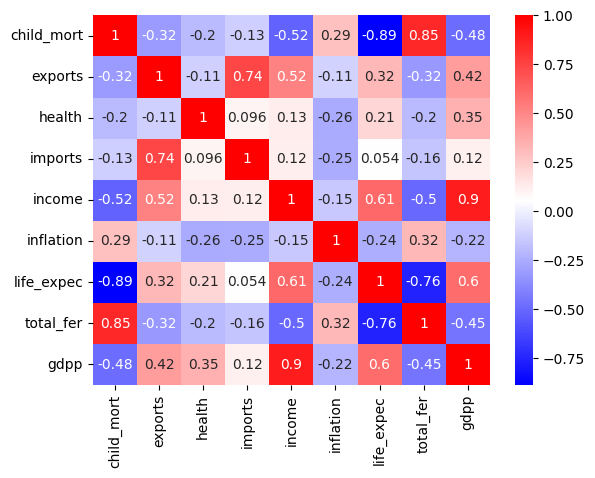

In [290]:
# Visulaisating correlation by plotting heat map in seaborn
sns.heatmap(corr_mat, annot=True, cmap="bwr")

**Insights gained from the correlation heatmap**

* There is a strong correlation between 'income' and 'GDP' indicating that a country's 'income' effects its GDP greatly.
* Naturally, there's a similar positive correlation between a country's GDP and it's 'exports' since the higher the country's exports, the higher will its 'income' be, and hence, the higher its GDP. This usually has a positive knowck effect on inflation, and as the above plot shows, the high a country's income, the higher its GDP. And the higher its GDP, the lower its inflation rate. The inverse will also be true: the lower the country's income, the lower its GDP, and the higher its inflation rate.
* There's an inverse correlation between (high) GDP and (low) inflation. Again, this is unsurprising.
* There's an inverse correlation between GDP & child mortality rates, meaning that the higher the GDP per person, the lower the child mortality rate in that country. Interestingly, there seems to be an even stronger correlation between GDP and child mortality than 'health' spending and child mortality. 
* Surprisingly, there's an inverse correlation between total fertility rate and GDP per person, suggesting that countries with lower GDPs per person may in fact have a higher fertility rate. However, this may be due to the fact that in developing countries, there may be limited access (or difficulty of access) to good healthcare, family planning & birth control.

**Checking for Outliers**

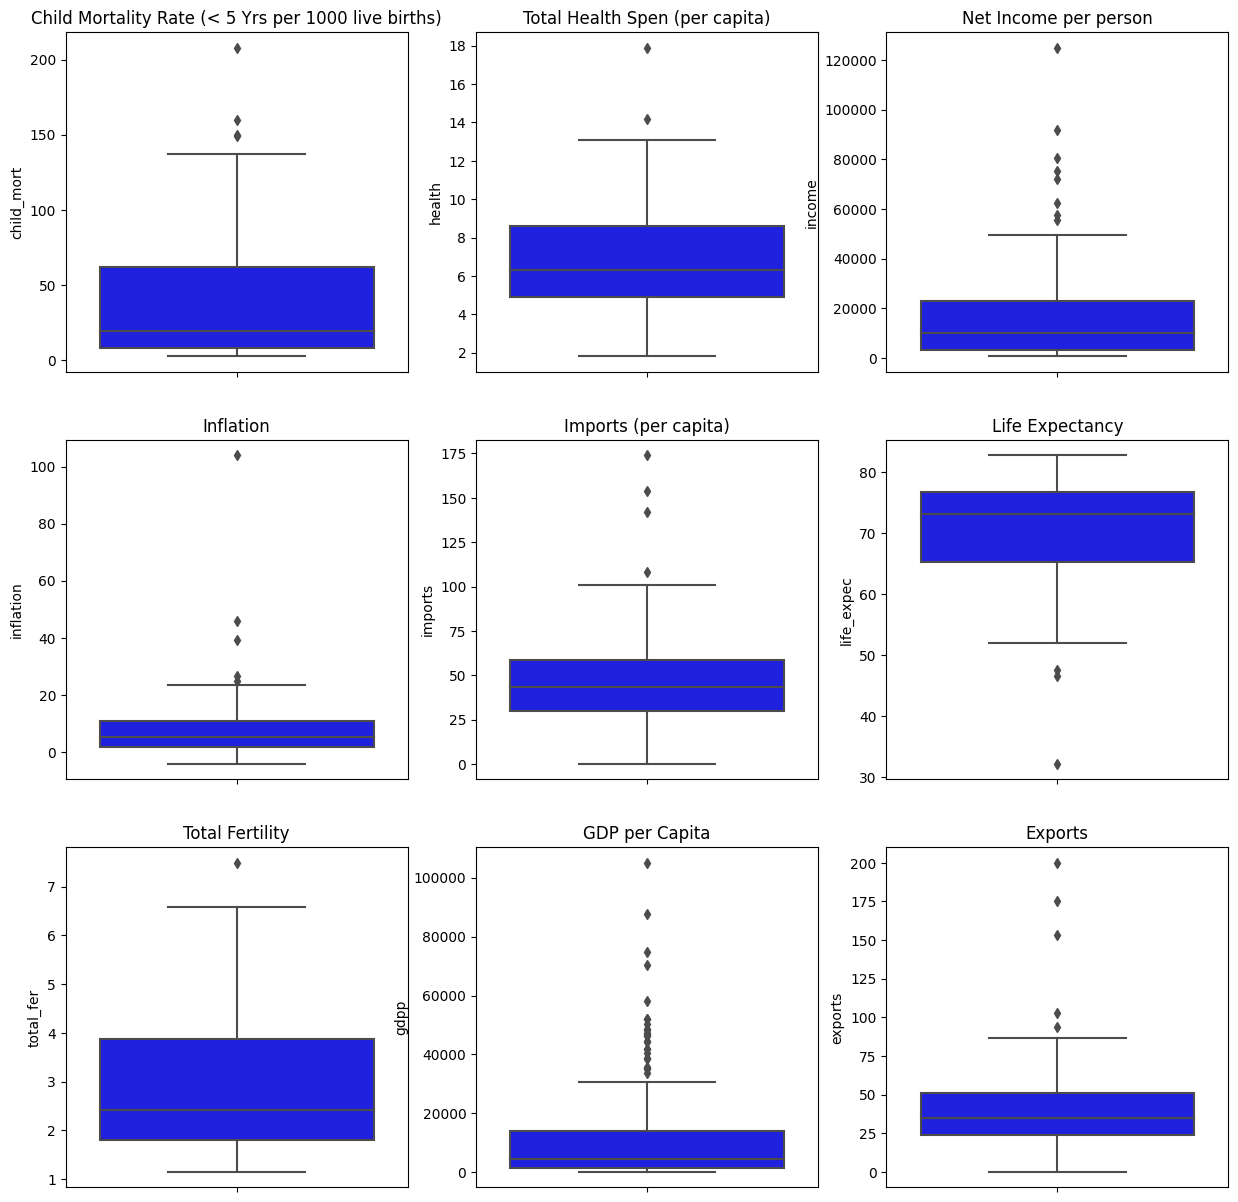

In [291]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=country_data.child_mort,ax=ax[0, 0],color='blue')
ax[0, 0].set_title('Child Mortality Rate (< 5 Yrs per 1000 live births)')
bp=sns.boxplot(y=country_data.health,ax=ax[0, 1],color='blue')
ax[0, 1].set_title('Total Health Spen (per capita)')
bp=sns.boxplot(y=country_data.income,ax=ax[0, 2],color='blue')
ax[0,2].set_title('Net Income per person')
bp=sns.boxplot(y=country_data.inflation,ax=ax[1, 0],color='blue')
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=country_data.imports,ax=ax[1,1],color='blue')
ax[1, 1].set_title('Imports (per capita)')
s=sns.boxplot(y=country_data.life_expec,ax=ax[1, 2],color='blue')
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=country_data.total_fer,ax=ax[2,0],color='blue')
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=country_data.gdpp,ax=ax[2, 1],color='blue')
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=country_data.exports,ax=ax[2,2],color='blue')
ax[2,2].set_title('Exports')
plt.show()

**Remove Outiers? Surely not!**

* Although there are many columns with outliers in this dataset, I am not going to remove them since the whole point of this project is to identify countries that are most in need of aid. 
* Leaving the outliers in will allow our model to identify countries that have poverty indicators (i.e. very high child mortality rates, very low income, low exports, very low GDP, etc. by omparison to other countries) and cluster those into a separate clusters.
* Removing outliers in this kind of project would, therefore, be counter-productive. 


#### **DATA PREPARATION**

* Dropping the 'country' column

In [292]:
# dropping the 'country' column from dataset
data = country_data.drop(['country'],axis=1)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


* Standardising data

In [293]:
scaling = StandardScaler()
scaled = scaling.fit_transform(data)

* Checking scaled data in dataframe

In [294]:
# creating a new DataFrame called 'scaled_df' by using the scaled data and the column names from the original 'data' DataFrame.
std_df=pd.DataFrame(scaled,columns=data.columns)
std_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [295]:
std_df.describe().round()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-4.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
75%,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
max,4.0,6.0,4.0,5.0,6.0,9.0,1.0,3.0,5.0


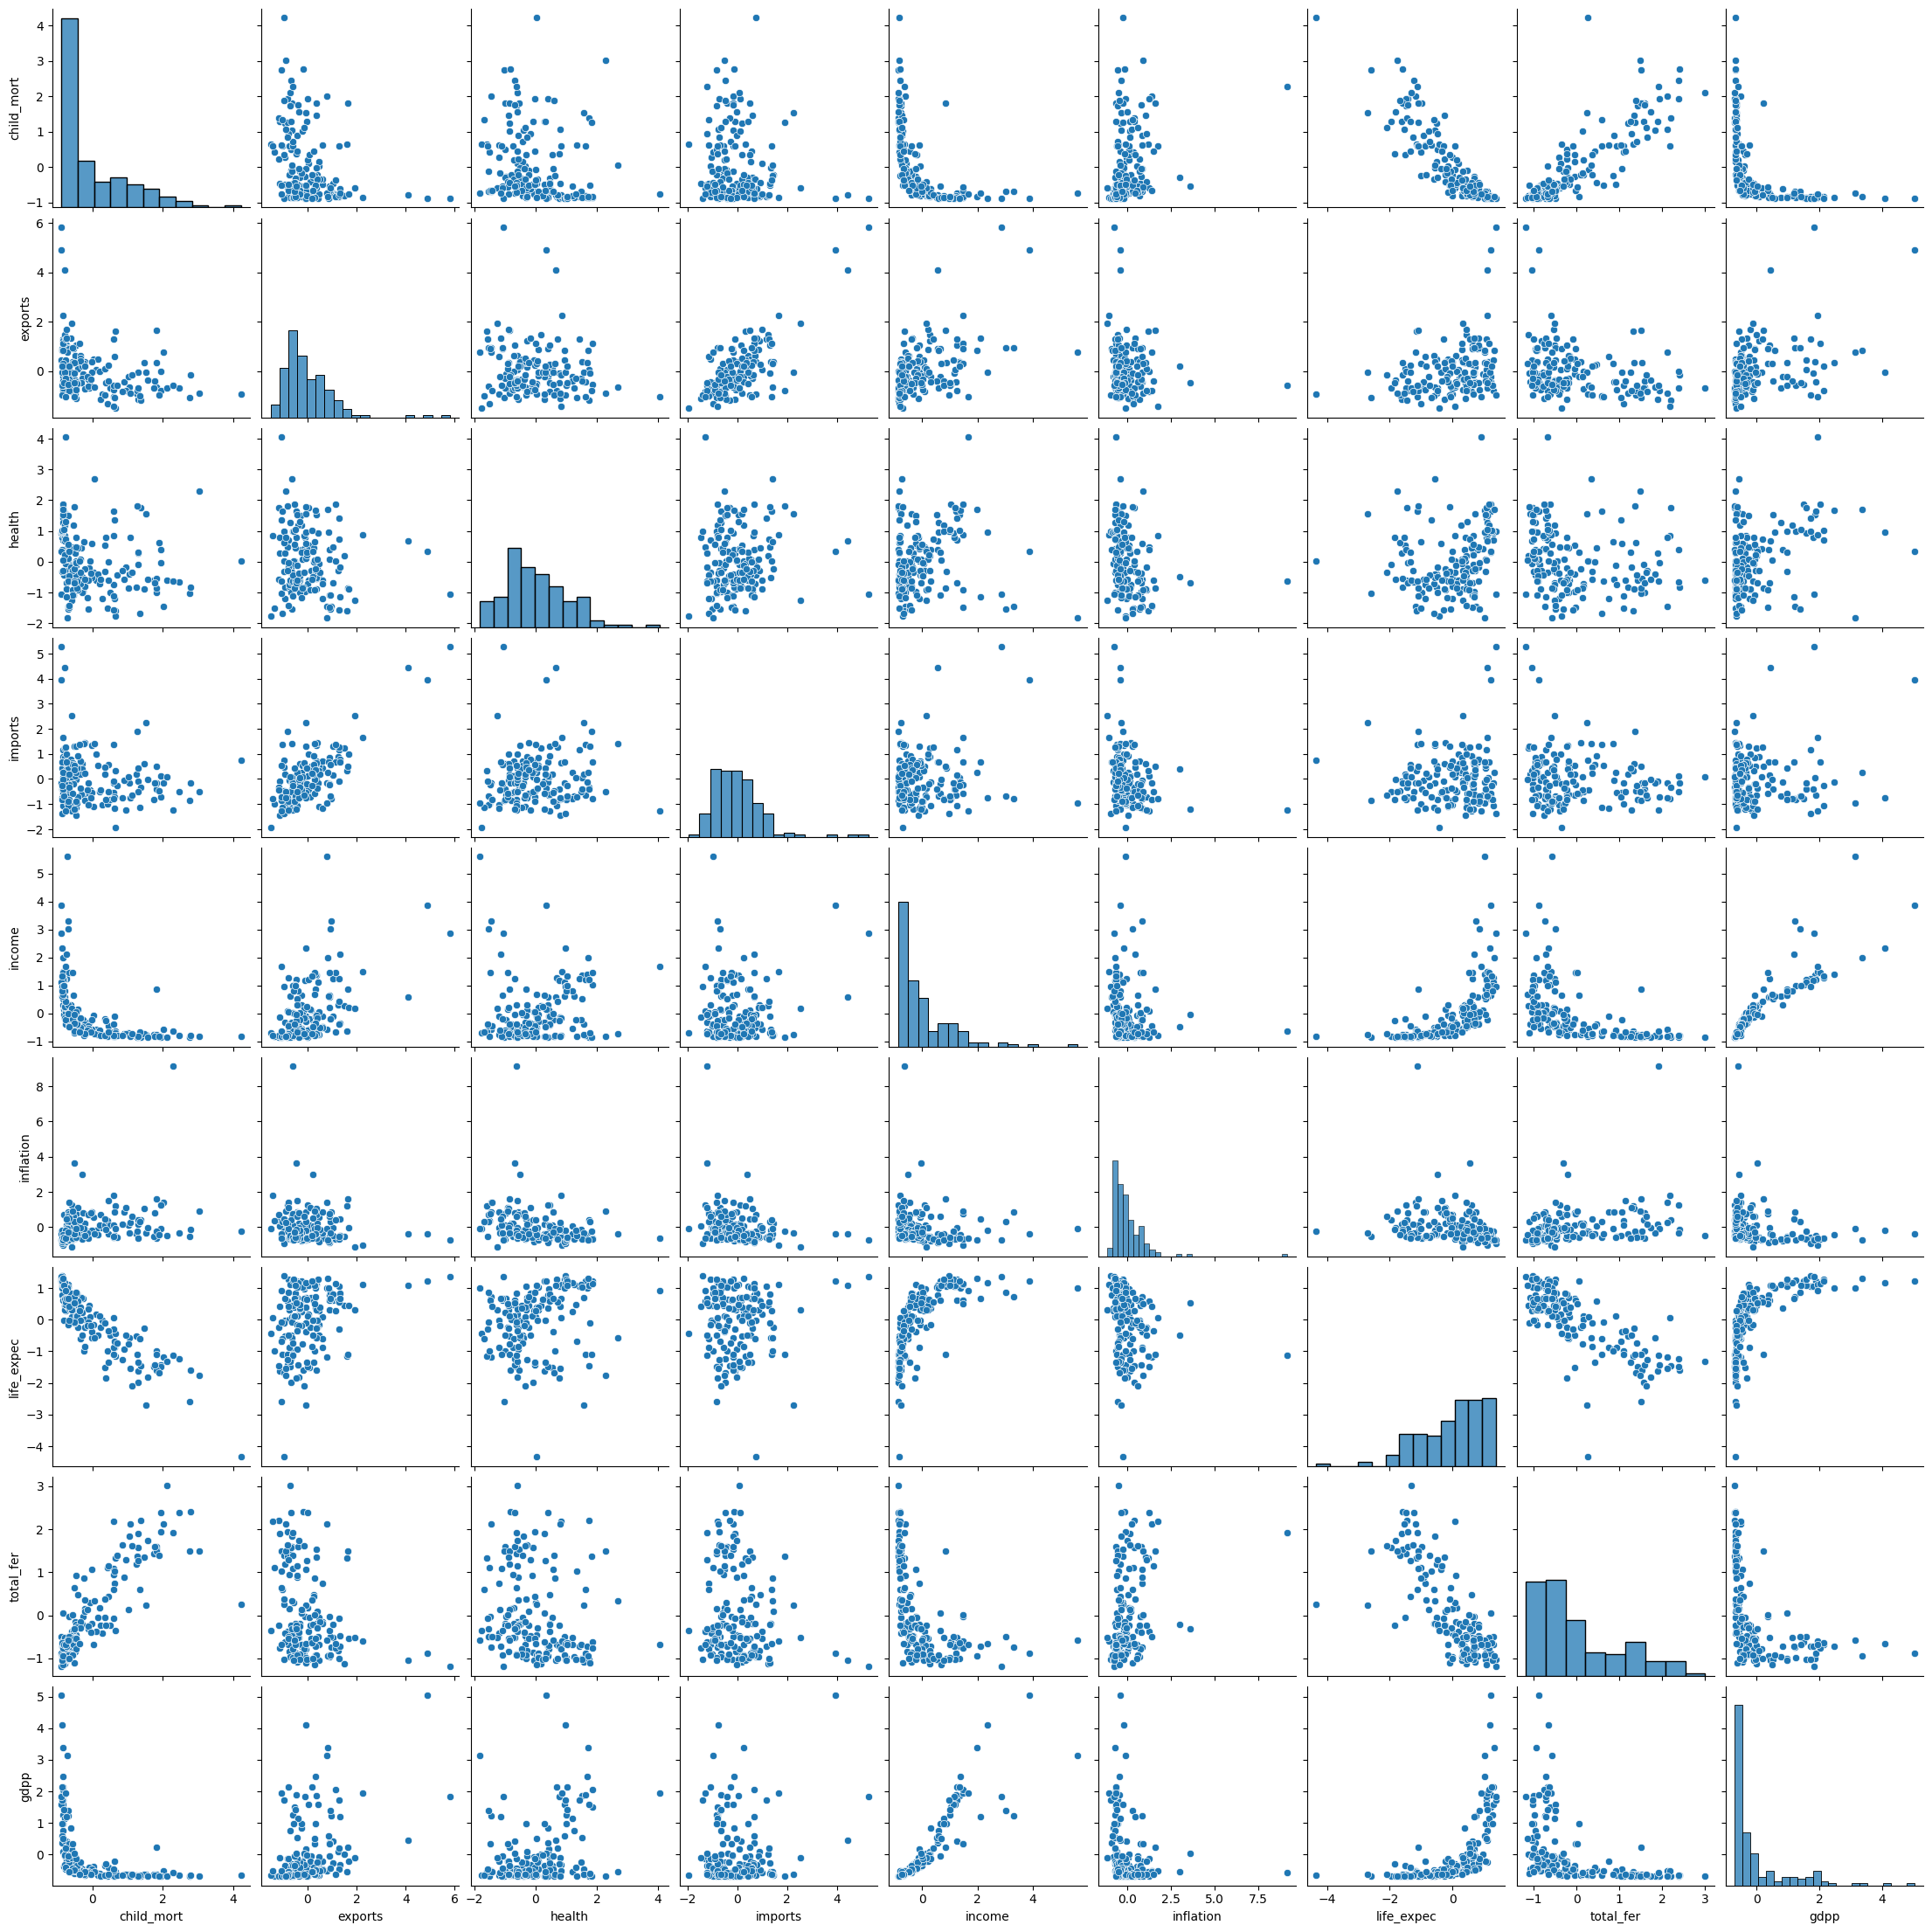

In [296]:
# Visualising my scaled / standardized data through pairplot
sns.pairplot(std_df)

#### **CHOOSING THE RIGHT MODEL**

#### **The Hopkins Test**

The Hopkins test is a statistical test used in data science to assess the clustering tendency of a dataset. Its purpose is to determine whether the data points in a given dataset are clustered or randomly distributed. The test provides a measure called the Hopkins statistic, which ranges between 0 and 1.
The Hopkins test is often used as a preliminary step in exploratory data analysis to determine whether clustering algorithms such as K-means or hierarchical clustering are appropriate for a given dataset. If the Hopkins statistic is close to 1, it suggests that clustering algorithms may be effective in identifying meaningful clusters within the data.

In [297]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [298]:
hopkins(std_df)

0.8783999588013425

The Hopkins statistic score we obtained (in this case 0.8783999588013425) provides an indication of the clustering tendency of our dataset. The score ranges between 0 and 1, where:

* Values close to 0 indicate a low clustering tendency, suggesting that the dataset is uniformly distributed or randomly dispersed.
* Values close to 1 indicate a high clustering tendency, suggesting that the dataset has distinct clusters or subgroups.

Our score suggests that there is a very good clustering tendency in our dataset

#### **CHOOSING THE OPTIMAL NUMBER OF CLUSTERS**

#### **The Elbow Method**

K-Means is a widely used and straightforward iterative unsupervised learning algorithm, differing from supervised learning by not requiring labeled data. Other unsupervised learning methods include PCA (Principle Component Analysis) and K-Medoid. 

In K-Means, the algorithm begins by randomly initializing K cluster centroids within the data. The algorithm then iteratively adjusts these centroids until their positions no longer change. Determining the optimal number of clusters is a crucial aspect of this algorithm.

There are several methods we can use to determine the optimal number of clusters for our dataset (e.g. the Elbow Method, Silhoutte Score, Gap statistic, Density-Based Methods, etc.).

Here, we will perform the Elbow Method. The Elbow Method is commonly employed as a means to find the most suitable K value.  In this method, we run the K-means clustering algorithm for a range of cluster numbers and plot the within-cluster sum of squares (WCSS) or the sum of squared distances between each point and its centroid. The plot resembles an elbow, and the optimal number of clusters is typically located at the "elbow" or the point of diminishing returns, where the decrease in WCSS slows down significantly.

* Plotting the Elbow Curve

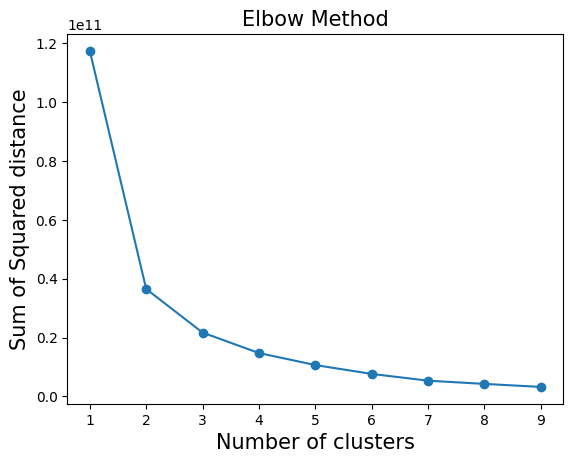

In [299]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

* Here, we plot the percentage of variance explained by the clusters against the number of clusters. The first will explain a lot of variance but at some point the marginal gain will drop, giving us an angle in the plot.
* We can see from above graph that this drop is at (3), so this is where the 'elbow' bends. This suggests that we can set the value of K at 3 (clusters).

#### **BUILDING UNSUPERVISED K-MEANS ML MODEL**

In [300]:
# Selecting 3 cluster & fitting our Kmeans model to data
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(std_df)

KMeans(n_clusters=3, random_state=42)

In [301]:
pd.Series(kmeans.labels_).value_counts()

2    84
1    47
0    36
Name: count, dtype: int64

#### **EVALUATING K-MEANS MODEL**

#### **The Silhoutte Method**

The silhouette method is a popular technique for evaluating the quality of clustering results, including k-means clustering. It provides a measure of how well each data point fits within its assigned cluster and how distinct the clusters are from each other. The silhouette score ranges from -1 to 1, where:

* A score close to 1 indicates that the data point is well-matched to its own cluster and poorly-matched to neighboring clusters, implying a good clustering result.
* A score close to 0 suggests that the data point is on or near the decision boundary between two neighboring clusters.
* A score close to -1 indicates that the data point may have been assigned to the wrong cluster.

In [302]:
# Calculating out Kmeans Model's performance using the Silhouette Method

metrics.silhouette_score(std_df, kmeans.labels_)

0.28329575683463126

**PREDICTING VALUES**

In [303]:
cluster_labels = kmeans.fit_predict(std_df)

In [338]:
# Assigning cluster labels to each data point in the scaled_df dataset
# Retrieving the cluster labels assigned to each data point after fitting the K-means model
# Creating new kmeans_df dataframe w/ all new predicted cluster labels and adding a new column called 'KMeans_Clusters' to the kmeans_df
# Checking that new column 'KMeans_Clusters' has been added to the newly created kmeans_df

preds = kmeans.labels_
kmeans_df = pd.DataFrame(country_data)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


**VISUALISING THE PREDICTED VALUES/CLUSTERS**

<Axes: xlabel='KMeans_Clusters', ylabel='gdpp'>

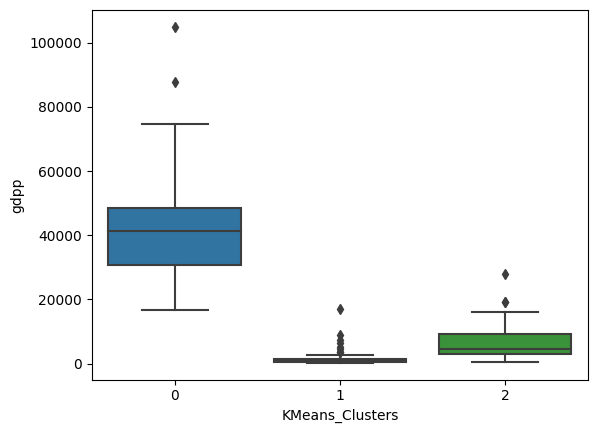

In [305]:
sns.boxplot(x='KMeans_Clusters', y='gdpp', data=kmeans_df)

* Cluster no. 1 has lowest GDPP, followed by cluster no.2, then finally 0. This suggest that Cluster 0 is the countries with highest GDPP (i.e. richest countries), followed by cluster 2 (developing countries), and finally cluster 1 (under-developed countries)

<Axes: xlabel='KMeans_Clusters', ylabel='child_mort'>

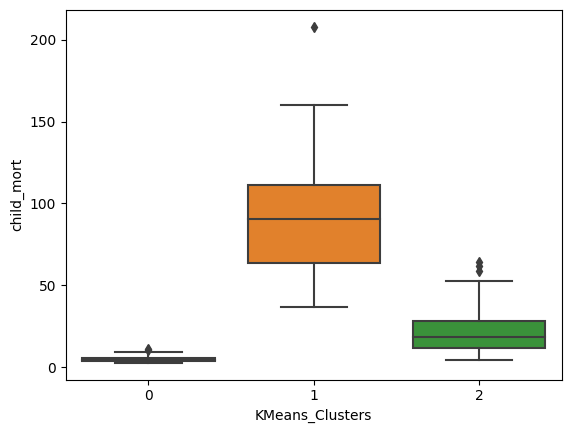

In [306]:
sns.boxplot(x='KMeans_Clusters', y='child_mort', data=kmeans_df)

* As one would suspect in an under-developed country, cluster 1 has a high child mortality rate, followed by cluster 2, then 0. This fits well with the previous plot where 1 was the poorest country and 0 was the richest.

<Axes: xlabel='KMeans_Clusters', ylabel='income'>

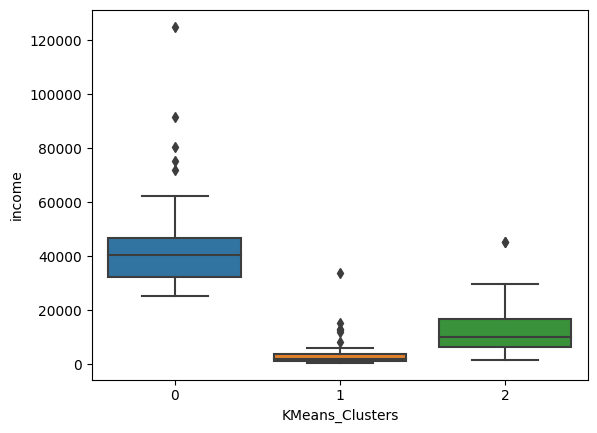

In [307]:
sns.boxplot(x='KMeans_Clusters', y='income', data=kmeans_df)

* Again, the clustering fits well with the previous plots and our understanding on under-developed countries. As we can see here, cluster 1 has low income, cluster 0 high income, and cluster 2 medium income. Against, this fits well with the GDPP plot earlier and what we said earlier.

<Axes: xlabel='KMeans_Clusters', ylabel='total_fer'>

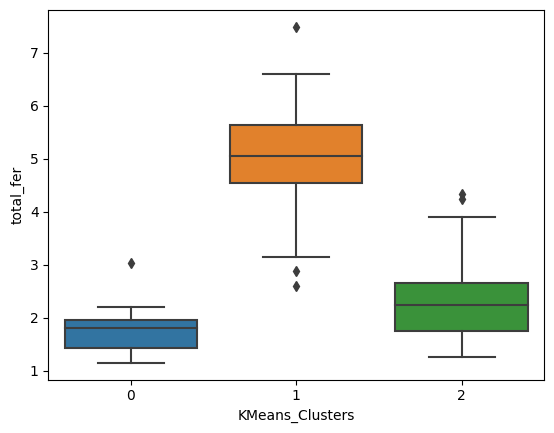

In [308]:
sns.boxplot(x='KMeans_Clusters', y='total_fer', data=kmeans_df)

* Unsurprisingly, fertility rate is high in the poorest/under-developed countries (cluster 1). The correlation matrix heatmap had earlier showed a strong correlation between high fertility rates and poor income/GDPP countries. The assumption we made there was that people in those countries lacked access to proper healthcare, family planning and birth control -- all of which contribute to high fertility rates

<Axes: xlabel='KMeans_Clusters', ylabel='inflation'>

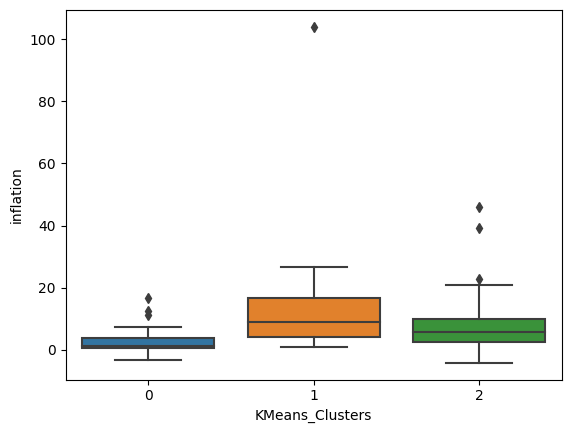

In [309]:
sns.boxplot(x='KMeans_Clusters', y='inflation', data=kmeans_df)

* Finally, when discussing the correlations in the heatmap, we said that poor countries tend to have much higher inflation rates than those with high GDPP and high income. Again, our K-Means model has correctly identified that cluster 1 (poorest countrie) also tend to have higher inflation rates.

**ADDING NEW LABELS TO OUR DATAFRAME BASED ON PREDICTIONS**

The plots clearly show the following:

- Cluster 0 = Developed Country
- Cluster 1 = Under-developed Country
- Cluster 2 = Developing Country

I'm now going to replace these numerical values with the appropriate labels (developed, developing & under-developed)

In [325]:
# Define a mapping dictionary for the transformation
cluster_labels = {
    0: 'Developed',
    1: 'Underdeveloped',
    2: 'Developing'
}

In [326]:
# Replace the numerical values with the corresponding labels
kmeans_df['KMeans_Clusters'] = kmeans_df['KMeans_Clusters'].replace(cluster_labels)

In [327]:
# Checking the updated dataframe with new categorical cluster labels
kmeans_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing


**SAVING NEW DATAFRAME WITH NEW / PREDICTED CLUSTER LABELS**

In [332]:
# Saving the results to new csv file
kmeans_df.to_csv('kmeans_result.csv',index=False)

**PRODUCING A LIST OF UNDER-DEVELOPED COUNTRIES**

In [328]:
# Using .isin() to isolate the 'underdeveloped' countries from the kmean_df
under_developed = ['Underdeveloped']
underdeveloped_df = kmeans_df[kmeans_df['KMeans_Clusters'].isin(under_developed)]

In [335]:
# Checking number of rows match the previously predicted cluster 1 (47)
underdeveloped_df.shape

(47, 11)

In [336]:
pd.Series(kmeans.labels_).value_counts()

2    84
1    47
0    36
Name: count, dtype: int64

#### **CONCLUSION: UNDER-DEVELOPED COUNTRIES LIST**

Below is a list of 47 under-developed countries predicted and clusterd by our Unsupervised K-Means Clustering Machine Learning Model. 

This list will help the charity ensure that it's aid packages and programmes are directed at the countries that need them most.

Directly below the list, there are some insights, communicated with the aid of visualisations, that the chairty might find helpful. The visualisations explain how our model has clustered the data.


In [333]:
# Printing list of all 47 under-developed countries (alphabetically)
underdeveloped_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Underdeveloped
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Underdeveloped
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Underdeveloped
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,Underdeveloped
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Underdeveloped
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Underdeveloped
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,Underdeveloped
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,Underdeveloped
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,Underdeveloped
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,Underdeveloped


**INSIGHTS THROUGH VISUALISATION**

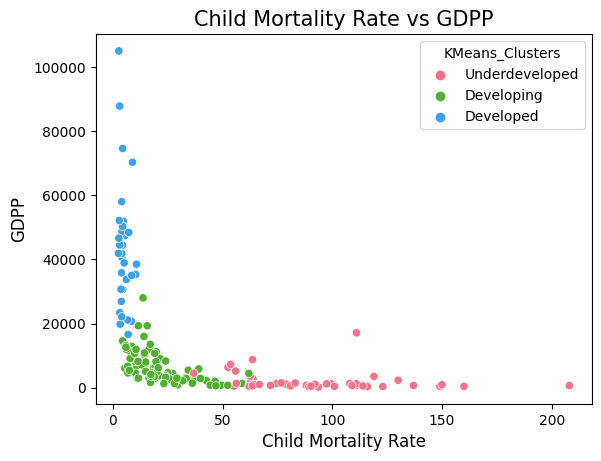

In [330]:
# Define the number of shades (clusters) and the base color
num_shades = 3
base_color = "husl"

# Generate a gradient color palette with the specified number of shades
cluster_palette = sns.color_palette(base_color, n_colors=num_shades)

# Plot the scatter plot with the gradient color palette
sns.scatterplot(x=kmeans_df['child_mort'], y=kmeans_df['gdpp'], hue=kmeans_df['KMeans_Clusters'], palette=cluster_palette)

# Set the title, x-axis label, and y-axis label
plt.title("Child Mortality Rate vs GDPP", fontsize=15)
plt.xlabel("Child Mortality Rate", fontsize=12)
plt.ylabel("GDPP", fontsize=12)

# Show the plot
plt.show()

We saw earlier that low GDPP & high child mortality rates are highly correlated. The under-developed countries are clustered (in pink) accordingly.

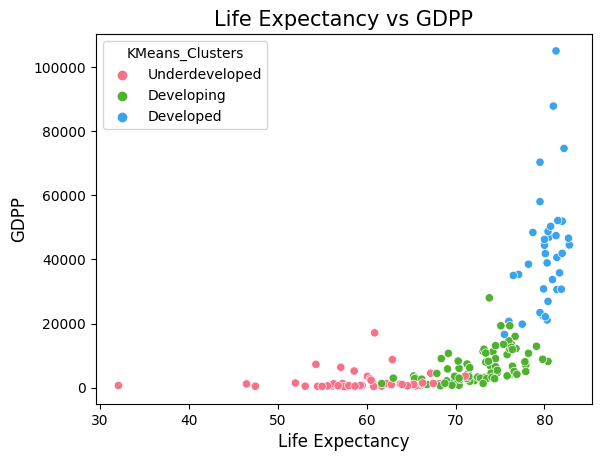

In [331]:
# Define the number of shades (clusters) and the base color
num_shades = 3
base_color = "husl"

# Generate a gradient color palette with the specified number of shades
cluster_palette = sns.color_palette(base_color, n_colors=num_shades)

# Plot the scatter plot with the gradient color palette
sns.scatterplot(x=kmeans_df['life_expec'], y=kmeans_df['gdpp'], hue=kmeans_df['KMeans_Clusters'], palette=cluster_palette)

# Set the title, x-axis label, and y-axis label
plt.title("Life Expectancy vs GDPP", fontsize=15)
plt.xlabel("Life Expectancy", fontsize=12)
plt.ylabel("GDPP", fontsize=12)

# Show the plot
plt.show()

But low GDPP does not only translate into high child mortality rates. In fact, it means low life expectancy in general. Again, the under-developed countries are clustered (in pink) accordingly, where both life expectancy & GDPP are very low. 